<a href="https://colab.research.google.com/github/cesaroliveiragoes/Statistics-for-Data-Science/blob/main/Global_Solution_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import zeros, ones, expand_dims, asarray
from numpy.random import randn, randint
from keras.datasets import fashion_mnist
from keras.optimizers import Adam
from keras.models import Model, load_model
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import Conv2D, Conv2DTranspose, Concatenate
from keras.layers import LeakyReLU, Dropout, Embedding
from keras.layers import BatchNormalization, Activation
from keras import initializers
from keras.initializers import RandomNormal
from keras.optimizers import Adam, RMSprop, SGD
from matplotlib import pyplot
import numpy as np
from math import sqrt

# Importando bibliotecas necessárias

# Numpy é uma biblioteca para realizar operações matemáticas eficientes em arrays multidimensionais.
# zeros: Cria uma matriz de zeros com a forma especificada.
# ones: Cria uma matriz de uns com a forma especificada.
# expand_dims: Expande a dimensão de um array existente.
# asarray: Converte a entrada em um array do numpy.

# numpy.random é um módulo para gerar números aleatórios.
# randn: Gera uma matriz de números aleatórios a partir de uma distribuição normal.
# randint: Gera uma matriz de números inteiros aleatórios em um intervalo especificado.

# Keras é uma biblioteca de aprendizado profundo de alto nível, construída em cima do TensorFlow.
# datasets: Contém conjuntos de dados populares para experimentos de aprendizado de máquina.
# fashion_mnist: Conjunto de dados que contém imagens em escala de cinza de roupas.
#                É uma variação do conjunto de dados MNIST, mas com roupas em vez de dígitos escritos à mão.

# Optimizers (Otimizadores) são algoritmos usados para ajustar os parâmetros de um modelo de aprendizado de máquina
# com o objetivo de minimizar a função de perda.
# Adam: Algoritmo de otimização que combina ideias do Gradiente Descendente com Momento e AdaGrad.

# Models (Modelos) representam a arquitetura dos modelos de aprendizado de máquina.
# Model: Classe base para todos os modelos do Keras.

# Layers (Camadas) são os blocos de construção fundamentais de uma rede neural no Keras.
# Input: Camada de entrada para um modelo do Keras.
# Dense: Camada de neurônios totalmente conectados.
# Reshape: Camada que remodela a entrada em uma determinada forma.
# Flatten: Camada que aplaina a entrada.
# Conv2D: Camada de convolução bidimensional.
# Conv2DTranspose: Camada de convolução transposta bidimensional.
# Concatenate: Camada que concatena várias entradas.
# LeakyReLU: Ativação de retificação linear vazada.
# Dropout: Camada que aplica o dropout às entradas.
# Embedding: Camada que mapeia números inteiros em vetores densos.
# BatchNormalization: Normalização em lote.
# Activation: Função de ativação.

# initializers (Inicializadores) são usados para definir o valor inicial dos pesos de uma camada em um modelo.
# RandomNormal: Inicializa os pesos de uma camada a partir de uma distribuição normal.

# matplotlib é uma biblioteca para plotagem de gráficos em Python.
# pyplot: Módulo que fornece uma interface semelhante ao MATLAB para plotar gráficos.

# numpy é a biblioteca fundamental para computação científica em Python.
# np: Alias para a biblioteca numpy.

# math é um módulo em Python que fornece funções matemáticas básicas.
# sqrt: Retorna a raiz quadrada de um número.



In [ ]:
(X_train, _), (_, _) = fashion_mnist.load_data()
# Carrega o conjunto de dados Fashion MNIST, que contém imagens de roupas, e atribui as imagens a `X_train`.
# O `_` é usado para ignorar as informações de rótulos, que não são necessárias nesta parte do código.

X_train = X_train.astype(np.float32) / 127.5 - 1
# Converte o tipo de dados das imagens para `np.float32`.
# Normaliza as imagens dividindo-as por 127.5 e subtraindo 1.
# O objetivo é escalar os valores dos pixels das imagens para o intervalo entre -1 e 1.

X_train = np.expand_dims(X_train, axis=3)
# Expande a dimensão das imagens para que elas se tornem compatíveis com o modelo.
# Adiciona uma dimensão extra no eixo 3, que representa os canais de cor.
# Neste caso, as imagens estão em escala de cinza, portanto, a dimensão do canal é 1.

print(X_train.shape)
# Imprime a forma do conjunto de dados `X_train`, que representa o número de imagens, a largura, a altura e o número de canais.


4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


In [ ]:
def generate_latent_points(latent_dim, n_samples):
    # Função para gerar pontos latentes (vetores de entrada aleatórios) para a geração de imagens.
    # Recebe como parâmetros:
    # - latent_dim: Dimensão do espaço latente (número de elementos no vetor de entrada latente).
    # - n_samples: Número de amostras (vetores de entrada latente) a serem geradas.

    x_input = randn(latent_dim * n_samples)
    # Gera um array de números aleatórios com distribuição normal (média 0, desvio padrão 1)
    # com tamanho igual à multiplicação da dimensão latente pelo número de amostras.

    z_input = x_input.reshape(n_samples, latent_dim)
    # Redimensiona o array de entrada para ter a forma (n_samples, latent_dim),
    # onde n_samples representa o número de amostras e latent_dim representa a dimensão latente.

    return z_input
    # Retorna o vetor de entrada latente gerado.


In [ ]:
def generate_real_samples(X_train, n_samples):
    # Função para gerar amostras reais (imagens reais) a partir do conjunto de dados de treinamento.
    # Recebe como parâmetros:
    # - X_train: Conjunto de dados de treinamento contendo as imagens reais.
    # - n_samples: Número de amostras (imagens reais) a serem geradas.

    ix = randint(0, X_train.shape[0], n_samples)
    # Gera índices aleatórios para selecionar amostras aleatórias do conjunto de dados de treinamento.
    # O intervalo é definido de 0 até o tamanho do conjunto de dados (número de imagens) e o número de índices gerados é igual a n_samples.

    X = X_train[ix]
    # Seleciona as imagens correspondentes aos índices gerados aleatoriamente.
    # Essas são as amostras reais geradas a partir do conjunto de dados de treinamento.

    y = ones((n_samples, 1))
    # Cria um array de saída (rótulos) para as amostras reais.
    # Todos os rótulos são definidos como 1, indicando que são amostras reais.

    return X, y
    # Retorna as amostras reais (X) e os rótulos correspondentes (y).


In [ ]:
def generate_fake_samples(generator, latent_dim, n_samples):
    # Função para gerar amostras falsas (imagens geradas pelo gerador) a partir de pontos latentes.
    # Recebe como parâmetros:
    # - generator: O modelo do gerador utilizado para gerar as imagens falsas.
    # - latent_dim: Dimensão do espaço latente (número de elementos no vetor de entrada latente).
    # - n_samples: Número de amostras (imagens falsas) a serem geradas.

    z_input = generate_latent_points(latent_dim, n_samples)
    # Gera pontos latentes (vetores de entrada latente) usando a função generate_latent_points.
    # Esses pontos latentes serão usados como entrada para o gerador.

    images = generator.predict(z_input)
    # Gera imagens falsas (geradas pelo gerador) a partir dos pontos latentes.
    # O gerador é utilizado para fazer a previsão com base nos pontos latentes.

    y = zeros((n_samples, 1))
    # Cria um array de saída (rótulos) para as amostras falsas.
    # Todos os rótulos são definidos como 0, indicando que são amostras falsas.

    return images, y
    # Retorna as amostras falsas (imagens geradas) e os rótulos correspondentes (y).


In [ ]:
def summarize_performance(step, g_model, latent_dim, n_samples=100):
    # Função para resumir o desempenho do modelo gerador durante o treinamento.
    # Recebe como parâmetros:
    # - step: Passo atual do treinamento.
    # - g_model: O modelo do gerador.
    # - latent_dim: Dimensão do espaço latente (número de elementos no vetor de entrada latente).
    # - n_samples: Número de amostras (imagens geradas) a serem resumidas. Valor padrão é 100.

    X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
    # Gera amostras falsas (imagens geradas pelo gerador) usando a função generate_fake_samples.

    X = (X + 1) / 2.0
    # Ajusta os valores dos pixels das imagens geradas para o intervalo entre 0 e 1.
    # Os valores originais estavam no intervalo entre -1 e 1, então é adicionado 1 e dividido por 2.

    for i in range(100):
        pyplot.subplot(10, 10, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
    # Plota as 100 imagens geradas em uma grade 10x10 usando a biblioteca matplotlib.pyplot.
    # Cada imagem é exibida em escala de cinza.

    filename2 = 'model_%04d.h5' % (step+1)
    # Cria um nome de arquivo para salvar o modelo do gerador.
    # O nome do arquivo inclui o número do passo atual do treinamento.

    g_model.save(filename2)
    # Salva o modelo do gerador em um arquivo HDF5.

    print('>Saved: %s' % (filename2))
    # Imprime uma mensagem indicando que o modelo do gerador foi salvo.



In [ ]:
def save_plot(examples, n_examples):
    # Função para salvar um conjunto de exemplos (imagens) em um único plot.
    # Recebe como parâmetros:
    # - examples: Conjunto de exemplos (imagens) a serem plotados.
    # - n_examples: Número de exemplos a serem plotados.

    for i in range(n_examples):
        pyplot.subplot(sqrt(n_examples), sqrt(n_examples), 1 + i)
        # Cria um subplot na posição específica da grade definida por sqrt(n_examples) no eixo x e sqrt(n_examples) no eixo y.
        # O índice é incrementado em 1 em cada iteração para posicionar o subplot corretamente.

        pyplot.axis('off')
        # Desativa os eixos do subplot.

        pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
        # Exibe a imagem do exemplo atual no subplot.
        # O cmap='gray_r' indica que a imagem será exibida em escala de cinza invertida.

    pyplot.show()
    # Mostra o plot com todos os subplots dos exemplos.


In [ ]:
def define_discriminator(in_shape=(28, 28, 1)):
    # Função para definir o modelo do discriminador.
    # Recebe como parâmetro:
    # - in_shape: Formato da imagem de entrada. Valor padrão é (28, 28, 1), representando imagens de escala de cinza de 28x28 pixels.

    init = RandomNormal(stddev=0.02)
    # Inicializador para os pesos do modelo.
    # A distribuição normal com desvio padrão 0.02 é usada para inicializar os pesos.

    in_image = Input(shape=in_shape)
    # Camada de entrada para as imagens. Recebe o formato da imagem de entrada.

    fe = Flatten()(in_image)
    # Camada de achatamento (flatten) para transformar a imagem em um vetor unidimensional.

    fe = Dense(1024)(fe)
    # Camada densa (fully connected) com 1024 neurônios.

    fe = LeakyReLU(alpha=0.2)(fe)
    # Camada de ativação LeakyReLU com inclinação (slope) de 0.2 para introduzir não-linearidade.

    fe = Dropout(0.3)(fe)
    # Camada de dropout com taxa de dropout de 0.3 para regularização.

    fe = Dense(512)(fe)
    # Camada densa (fully connected) com 512 neurônios.

    fe = LeakyReLU(alpha=0.2)(fe)
    # Camada de ativação LeakyReLU com inclinação (slope) de 0.2.

    fe = Dropout(0.3)(fe)
    # Camada de dropout com taxa de dropout de 0.3.

    fe = Dense(256)(fe)
    # Camada densa (fully connected) com 256 neurônios.

    fe = LeakyReLU(alpha=0.2)(fe)
    # Camada de ativação LeakyReLU com inclinação (slope) de 0.2.

    fe = Dropout(0.3)(fe)
    # Camada de dropout com taxa de dropout de 0.3.

    out = Dense(1, activation='sigmoid')(fe)
    # Camada de saída com um neurônio e ativação sigmoid para a classificação binária (real ou falsa).

    model = Model(in_image, out)
    # Cria o modelo do discriminador, que mapeia imagens de entrada para a saída (classificação binária).

    opt = Adam(lr=0.0002, beta_1=0.5)
    # Otimizador Adam com taxa de aprendizagem de 0.0002 e beta_1 de 0.5.

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    # Compila o modelo usando a função de perda binary_crossentropy para a classificação binária.
    # Usa o otimizador definido anteriormente e calcula a acurácia como métrica de avaliação.

    return model
    # Retorna o modelo do discriminador definido.


In [ ]:
discriminator = define_discriminator()
# Cria o modelo do discriminador usando a função define_discriminator.
# O modelo é atribuído à variável 'discriminator'.


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
def define_generator(latent_dim):
    # Função para definir o modelo do gerador.
    # Recebe como parâmetro:
    # - latent_dim: Dimensão do espaço latente (número de elementos no vetor de entrada latente).

    init = RandomNormal(stddev=0.02)
    # Inicializador para os pesos do modelo.
    # A distribuição normal com desvio padrão 0.02 é usada para inicializar os pesos.

    in_lat = Input(shape=(latent_dim,))
    # Camada de entrada para o vetor de entrada latente.
    # Recebe o formato (dimensão) do vetor de entrada latente.

    gen = Dense(256, kernel_initializer=init)(in_lat)
    # Camada densa (fully connected) com 256 neurônios.
    # Os pesos são inicializados com o inicializador definido.

    gen = LeakyReLU(alpha=0.2)(gen)
    # Camada de ativação LeakyReLU com inclinação (slope) de 0.2.

    gen = Dense(512, kernel_initializer=init)(gen)
    # Camada densa (fully connected) com 512 neurônios.

    gen = LeakyReLU(alpha=0.2)(gen)
    # Camada de ativação LeakyReLU com inclinação (slope) de 0.2.

    gen = Dense(1024, kernel_initializer=init)(gen)
    # Camada densa (fully connected) com 1024 neurônios.

    gen = LeakyReLU(alpha=0.2)(gen)
    # Camada de ativação LeakyReLU com inclinação (slope) de 0.2.

    gen = Dense(28 * 28 * 1, kernel_initializer=init)(gen)
    # Camada densa (fully connected) com 28*28*1 = 784 neurônios.
    # Essa camada tem a função de gerar um vetor com as mesmas dimensões das imagens de entrada (28x28x1).

    out_layer = Activation('tanh')(gen)
    # Camada de ativação tangente hiperbólica (tanh) aplicada à saída do gerador.
    # A tangente hiperbólica mapeia os valores para o intervalo entre -1 e 1.

    out_layer = Reshape((28, 28, 1))(gen)
    # Camada de reshape (mudança de formato) para transformar o vetor de saída em uma imagem 28x28x1.

    model = Model(in_lat, out_layer)
    # Cria o modelo do gerador, que mapeia o vetor de entrada latente para a saída (imagem gerada).

    return model
    # Retorna o modelo do gerador definido.


In [ ]:
generator = define_generator(100)
# Cria o modelo do gerador usando a função define_generator.
# O modelo é atribuído à variável 'generator'.
# O parâmetro 100 é passado para a função define_generator para definir a dimensão do espaço latente.


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
def define_gan(g_model, d_model):
    # Função para definir o modelo GAN combinando o gerador e o discriminador.
    # Recebe como parâmetros:
    # - g_model: Modelo do gerador.
    # - d_model: Modelo do discriminador.

    d_model.trainable = False
    # Define que os pesos do discriminador não serão atualizados durante o treinamento do GAN.
    # Isso ocorre porque o objetivo do treinamento do GAN é atualizar apenas os pesos do gerador.

    gan_output = d_model(g_model.output)
    # Conecta a saída do gerador à entrada do discriminador para obter a saída do GAN.

    model = Model(g_model.input, gan_output)
    # Cria o modelo GAN, que mapeia o vetor de entrada latente do gerador para a saída do GAN.

    opt = Adam(lr=0.0002, beta_1=0.5)
    # Otimizador Adam com taxa de aprendizagem de 0.0002 e beta_1 de 0.5.

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    # Compila o modelo usando a função de perda binary_crossentropy para a classificação binária.
    # Usa o otimizador definido anteriormente e calcula a acurácia como métrica de avaliação.

    return model
    # Retorna o modelo GAN definido.


In [ ]:
gan_model = define_gan(generator, discriminator)
# Cria o modelo GAN combinando o gerador e o discriminador usando a função define_gan.
# O modelo do gerador e do discriminador são passados como parâmetros.
# O modelo GAN é atribuído à variável 'gan_model'.


In [ ]:
def train(g_model, d_model, gan_model, X_train, latent_dim, n_epochs=100, n_batch=64):
    # Função para treinar o modelo GAN.
    # Recebe como parâmetros:
    # - g_model: Modelo do gerador.
    # - d_model: Modelo do discriminador.
    # - gan_model: Modelo GAN combinando o gerador e o discriminador.
    # - X_train: Conjunto de dados de treinamento.
    # - latent_dim: Dimensão do espaço latente (número de elementos no vetor de entrada latente).
    # - n_epochs: Número de épocas de treinamento. Valor padrão é 100.
    # - n_batch: Tamanho do lote (batch size) para o treinamento. Valor padrão é 64.

    bat_per_epo = int(X_train.shape[0] / n_batch)
    # Calcula o número de lotes por época com base no tamanho do conjunto de dados de treinamento e no tamanho do lote.

    n_steps = bat_per_epo * n_epochs
    # Calcula o número total de etapas de treinamento com base no número de lotes por época e no número de épocas.

    for i in range(n_steps):
        # Loop pelas etapas de treinamento.

        X_real, y_real = generate_real_samples(X_train, n_batch)
        # Gera amostras reais do conjunto de dados de treinamento usando a função generate_real_samples.

        d_loss_r, d_acc_r = d_model.train_on_batch(X_real, y_real)
        # Treina o discriminador com as amostras reais usando a função train_on_batch.
        # Calcula a perda (loss) e a acurácia (accuracy) do discriminador com as amostras reais.

        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_batch)
        # Gera amostras falsas usando o gerador com a função generate_fake_samples.

        d_loss_f, d_acc_f = d_model.train_on_batch(X_fake, y_fake)
        # Treina o discriminador com as amostras falsas usando a função train_on_batch.
        # Calcula a perda (loss) e a acurácia (accuracy) do discriminador com as amostras falsas.

        z_input = generate_latent_points(latent_dim, n_batch)
        # Gera pontos latentes aleatórios usando a função generate_latent_points.

        y_gan = ones((n_batch, 1))
        # Cria rótulos (labels) para as amostras do GAN, que são todos iguais a 1 (indicando amostras reais).

        g_loss, g_acc = gan_model.train_on_batch(z_input, y_gan)
        # Treina o modelo GAN usando os pontos latentes e os rótulos gerados acima.
        # Calcula a perda (loss) e a acurácia (accuracy) do GAN.

        print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]' % (i+1, d_loss_r,d_acc_r, d_loss_f,d_acc_f, g_loss,g_acc))

        if (i+1) % (bat_per_epo * 1) == 0:
            # A cada epoch, quando o número da etapa é múltiplo do número de lotes por epoch, chama a função summarize_performance.
            summarize_performance(i, g_model, latent_dim)


2/2 [==============================] - 0s 14ms/step
>1, dr[0.646,0.578], df[0.700,0.000], g[0.688,0.969]
2/2 [==============================] - 0s 16ms/step
>2, dr[0.093,1.000], df[0.711,0.000], g[0.679,1.000]
2/2 [==============================] - 0s 15ms/step
>3, dr[0.034,1.000], df[0.723,0.000], g[0.668,1.000]
2/2 [==============================] - 0s 13ms/step
>4, dr[0.025,1.000], df[0.738,0.000], g[0.655,1.000]
2/2 [==============================] - 0s 9ms/step
>5, dr[0.014,1.000], df[0.763,0.000], g[0.636,1.000]
2/2 [==============================] - 0s 10ms/step
>6, dr[0.010,1.000], df[0.787,0.000], g[0.621,1.000]
2/2 [==============================] - 0s 10ms/step
>7, dr[0.014,1.000], df[0.819,0.000], g[0.605,1.000]
2/2 [==============================] - 0s 9ms/step
>8, dr[0.009,1.000], df[0.843,0.000], g[0.599,1.000]
2/2 [==============================] - 0s 9ms/step
>9, dr[0.009,1.000], df[0.846,0.000], g[0.607,1.000]
2/2 [==============================] - 0s 9ms/step
>10, dr

>Saved: model_0937.h5
2/2 [==============================] - 0s 11ms/step
>938, dr[0.460,0.766], df[0.598,0.734], g[4.057,0.000]
2/2 [==============================] - 0s 10ms/step
>939, dr[0.480,0.781], df[0.158,0.938], g[3.674,0.000]
2/2 [==============================] - 0s 13ms/step
>940, dr[0.449,0.828], df[0.262,0.906], g[2.834,0.000]
2/2 [==============================] - 0s 13ms/step
>941, dr[0.228,0.875], df[0.284,0.922], g[3.312,0.000]
2/2 [==============================] - 0s 9ms/step
>942, dr[0.275,0.812], df[0.122,1.000], g[2.817,0.000]
2/2 [==============================] - 0s 10ms/step
>943, dr[0.350,0.812], df[0.325,0.906], g[2.566,0.016]
2/2 [==============================] - 0s 11ms/step
>944, dr[0.239,0.844], df[0.284,0.938], g[2.959,0.000]
2/2 [==============================] - 0s 9ms/step
>945, dr[0.344,0.812], df[0.352,0.859], g[3.344,0.000]
2/2 [==============================] - 0s 11ms/step
>946, dr[0.541,0.750], df[0.370,0.906], g[3.038,0.031]
2/2 [============

>Saved: model_1874.h5


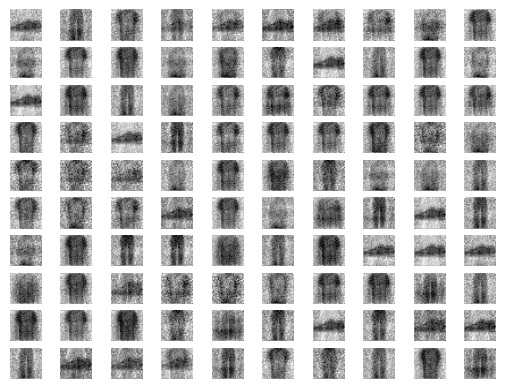

In [ ]:
latent_dim = 100
# Define a dimensão do espaço latente como 100.

train(generator, discriminator, gan_model, X_train, latent_dim, n_epochs=2, n_batch=64)
# Chama a função de treinamento 'train' passando os seguintes parâmetros:
# - generator: Modelo do gerador.
# - discriminator: Modelo do discriminador.
# - gan_model: Modelo GAN combinando o gerador e o discriminador.
# - X_train: Conjunto de dados de treinamento.
# - latent_dim: Dimensão do espaço latente.
# - n_epochs: Número de épocas de treinamento, definido como 20.
# - n_batch: Tamanho do lote (batch size) para o treinamento, definido como 64.


In [ ]:
model = load_model('model_1874.h5')
# Carrega o modelo salvo com o nome 'model_18740.h5' usando a função load_model do Keras.

latent_dim = 100
# Define a dimensão do espaço latente como 100.

n_examples = 10
# Define o número de exemplos a serem gerados como 100.

latent_points = generate_latent_points(latent_dim, n_examples)
# Gera pontos latentes aleatórios usando a função generate_latent_points.

X  = model.predict(latent_points)
# Gera exemplos sintéticos usando o modelo carregado e os pontos latentes.

X = (X + 1) / 2.0
# Redimensiona os valores dos exemplos para o intervalo [0, 1] dividindo por 2 e somando 1.

save_plot(X, n_examples)
# Chama a função save_plot para visualizar e salvar os exemplos gerados.


1/1 [==============================] - 0s 83ms/step


ValueError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
# Integrantes
# Cesar Oliveira Goes - RM: 98119
# Fiama dos Santos Trajano - RM: 97885
# Gabriel Silva de Negreiros Leal da Rocha - RM: 550759
# Karina Maciel Palmeira - RM: 551770

Integrantes: